#### Text data Preprocessing

- **nltk** library(Natural Language Toolkit)를 이용하여 Text Processing을 위한 전처리를 실습한다.


#### 1. 영어 문장 토큰화하기

In [1]:
# NLTK는 Anaconda 설치 시 이미 설치되어 있으므로 별도 설치가 불필요합니다.
# !pip install nltk==3.6.1

# Test processing을 위해 nltk package 를 import
import nltk

아래 명령어를 통해 download 대화상자를 열어 패키지를 다운로드 받아야 합니다.
<br>인터넷 속도 저하 시 매우 오래 걸리므로, 패키지 설치 경로만 확인한 다음 \[ (nltk, downloaded) nltk_data.zip ] 의 파일들을 복사합니다.
<br><br>경로 예시 : **"C:\Users\{컴퓨터 이름}\AppData\Roaming\nltk_data"**
<br>
**<p style='color:red;'>nltk_data 폴더 안에 corpora, taggers, tokenizers 폴더가 바로 위치하도록 복사해줘야 합니다.</p>**


In [6]:
# nltk.download()  # 텍스트 데이터 처리를 위한 패키지 다운로더

# Download following packages
# Corpora : stopwords, wordnet
# Models : averaged_perceptron_tagger, maxnet_treebank_pos_tagger, punkt

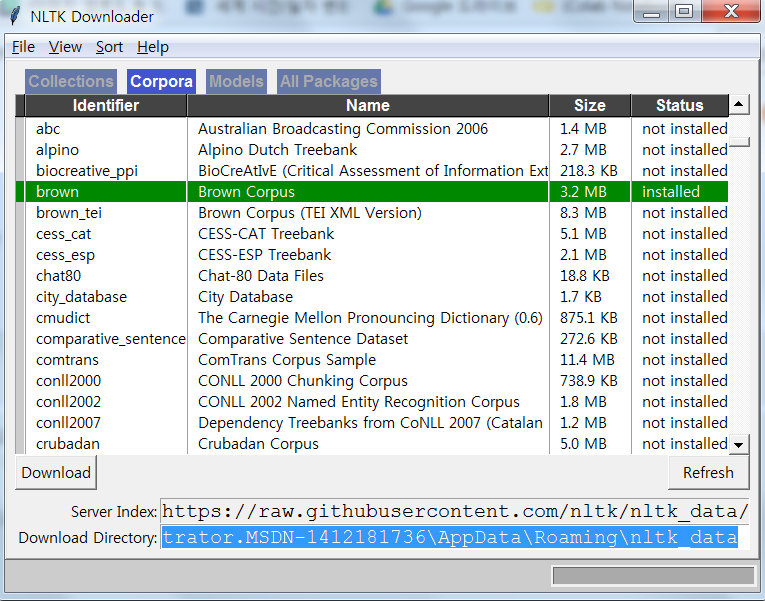

In [6]:
# 전처리하고자 하는 문장을 String 변수로 저장한다
sentence = 'NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.'

# 각 문장을 토큰화한 결과를 출력한다
nltk.?(sentence)  # 문장을 '단어 수준에서' 토큰화해 출력한다 

<br>
<br>

#### 2. 영어 문장 품사 태깅(POS tagging)하기

In [9]:
# 각 문장을 토큰화한 후 품사를 태깅하여 결과를 출력한다

tokens = nltk.?(sentence)  # 문장을 토큰화한다
nltk.?(tokens)  # 토큰화한 문장을 대상으로 품사를 태깅("POS" Tagging)하여 출력한다

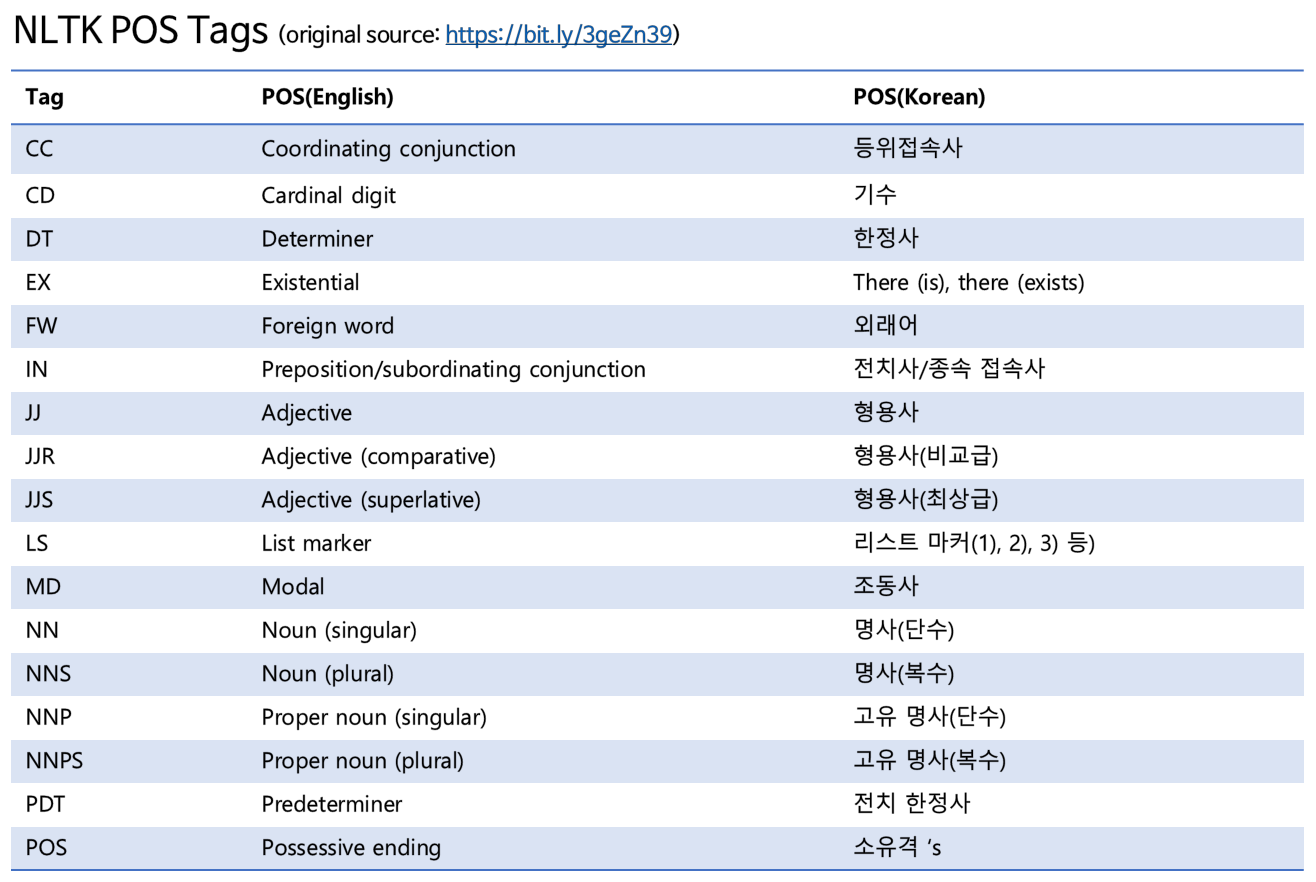

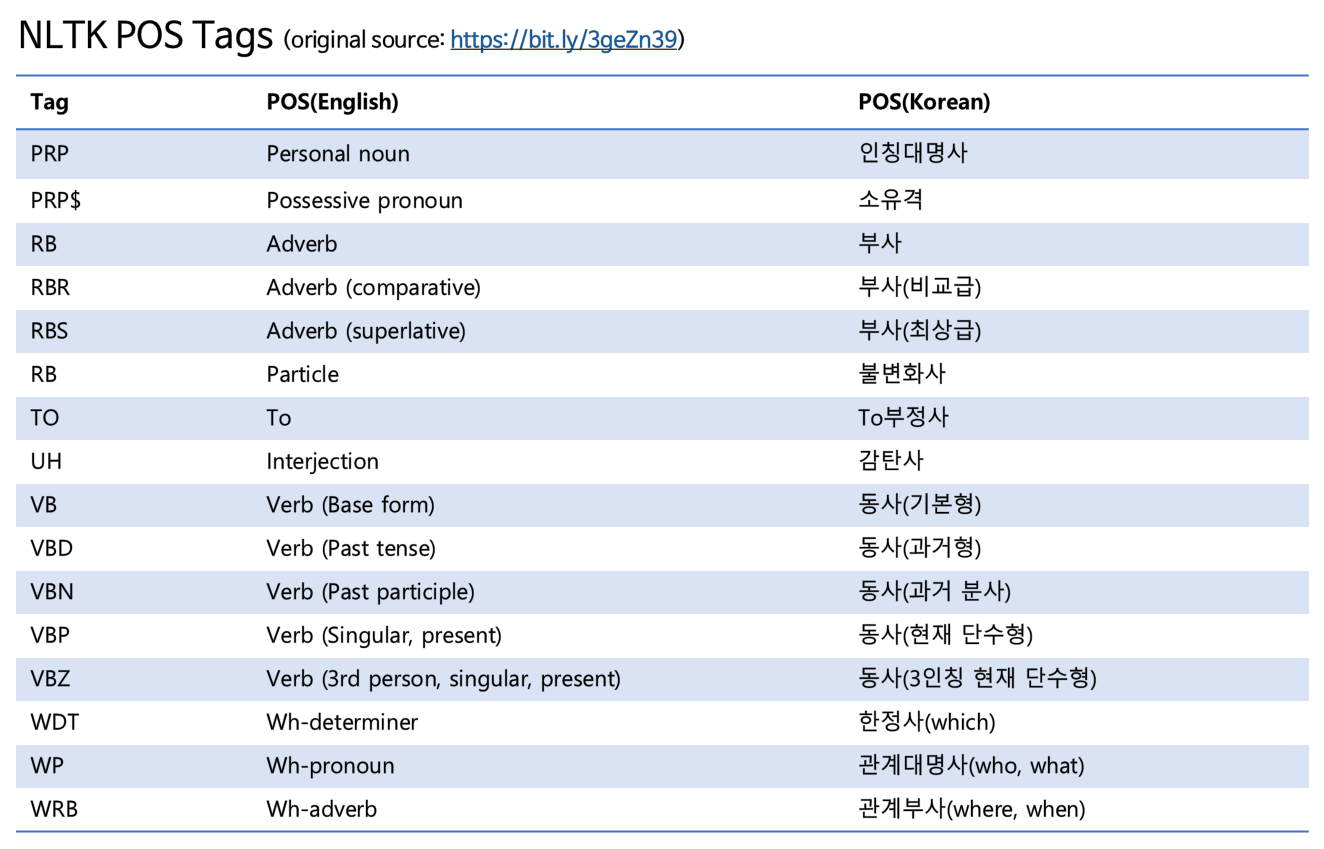

<br>
<br>

#### 3. Stopwords 제거하기

In [15]:
# nltk 모듈에서 Stopwords를 직접 불러온다
from nltk.corpus import stopwords

In [17]:
# 영어의 stopwords를 불러와 변수에 저장한다 (stopwords에 속하는 "단어" 리스트)
stopWords = stopwords.words('english') # 지원 언어 목록 : stopwords.fileids()

# How many stop words
print(len(stopWords))
print()

# stop words 출력
print(stopWords)

In [21]:
print(tokens)

['NLTK', 'is', 'a', 'leading', 'platform', 'for', 'building', 'Python', 'programs', 'to', 'work', 'with', 'human', 'language', 'data', '.', 'It', 'provides', 'easy-to-use', 'interfaces', 'to', 'over', '50', 'corpora', 'and', 'lexical', 'resources', 'such', 'as', 'WordNet', ',', 'along', 'with', 'a', 'suite', 'of', 'text', 'processing', 'libraries', 'for', 'classification', ',', 'tokenization', ',', 'stemming', ',', 'tagging', ',', 'parsing', ',', 'and', 'semantic', 'reasoning', ',', 'wrappers', 'for', 'industrial-strength', 'NLP', 'libraries', ',', 'and', 'an', 'active', 'discussion', 'forum', '.']


In [20]:
# 문장에서 stopwords 제거

result = []  # stopwords가 제거된 결과를 담기 위한 리스트를 생성한다

for token in tokens:  # for문을 통해 각각의 token이 stopwords인지 아닌지를 판별해 결과에 저장한다
    if token.?() not in stopWords:  # 만약 소문자로 변환한 token이 stopWords 내에 없으면:
        result.?(token)  # token을 리스트에 더해준다

print(result)  # 결과를 출력한다

['NLTK', 'leading', 'platform', 'building', 'Python', 'programs', 'work', 'human', 'language', 'data', '.', 'provides', 'easy-to-use', 'interfaces', '50', 'corpora', 'lexical', 'resources', 'WordNet', ',', 'along', 'suite', 'text', 'processing', 'libraries', 'classification', ',', 'tokenization', ',', 'stemming', ',', 'tagging', ',', 'parsing', ',', 'semantic', 'reasoning', ',', 'wrappers', 'industrial-strength', 'NLP', 'libraries', ',', 'active', 'discussion', 'forum', '.']


In [22]:
# stopwords에 쉼표(,)와 마침표(.) 추가하여 다시 적용하기

stop_words = stopwords.words("english") # stop_words == list
stop_words.?(',')
stop_words.?('.')

result = []  # stopwords가 제거된 결과를 담기 위한 리스트를 생성한다

for token in tokens:  # for문을 통해 각각의 token이 stopwords인지 아닌지를 판별해 결과에 저장한다
    if token.lower() not in stop_words:  # 만약 소문자로 변환한 token이 stopWords 내에 없으면:
        result.append(token)  # token을 리스트에 첨부한다

print(result)  # 결과를 출력한다

['NLTK', 'leading', 'platform', 'building', 'Python', 'programs', 'work', 'human', 'language', 'data', 'provides', 'easy-to-use', 'interfaces', '50', 'corpora', 'lexical', 'resources', 'WordNet', 'along', 'suite', 'text', 'processing', 'libraries', 'classification', 'tokenization', 'stemming', 'tagging', 'parsing', 'semantic', 'reasoning', 'wrappers', 'industrial-strength', 'NLP', 'libraries', 'active', 'discussion', 'forum']


<br>
<br>

#### 4. 영화 리뷰 데이터 전처리하기 - Lemmatizing
- Lemmatization : 단어의 형태소적 & 사전적 분석을 통해 파생적 의미를 제거하고, 어근에 기반하여 **기본 사전형인 lemma**를 찾는 것

In [2]:
# WordNetLemmatizer 객체 생성
lemmatizer = nltk.wordnet.WordNetLemmatizer()

In [ ]:
# WordNetLemmatize는 더 정확한 분석을 위해 PoS 정보를 추가로 입력받을 수 있음 (n : 명사 v : 동사 a : 형용사 r : 부사)
# default == n(명사) 이므로 'cats', 'geese' 들은 기본명사형인 'cat','geese'로 결과가 출력됨
# 'ran'은 동사를 나타내는 PoS 정보인 'v'를 함께 입력해주어야 제대로 결과를 확인할 수 있음
# 'better'도 마찬가지로, '형용사(a)'라는 정보를 함께 입력해주어야 원형인 'good'을 제대로 출력해줌

print(lemmatizer.?("cats")) # lemmatize한 결과를 출력한다
print(lemmatizer.?("geese"))

In [ ]:
print(lemmatizer.?("better"))
print(lemmatizer.?("better", pos="a"))

In [ ]:
print(lemmatizer.?("ran"))
print(lemmatizer.?("ran", 'v'))

In [24]:
# Stopwords
stop_words = stopwords.words("english")
stop_words.append(',')
stop_words.append('.')

file = open('moviereview.txt', 'r', encoding='utf-8') # 읽기 형식('r')로 지정하고 인코딩은 'utf-8'로 설정한다
lines = file.readlines()  # readlines 함수로 텍스트 파일의 내용을 읽어 리스트로 저장한다

sentence = lines[1] 
tokens = nltk.word_tokenize(sentence)  

# for문을 통해 stopwords 제거와 lemmatization을 수행한다
lemmas = []  # lemmatize한 결과를 담기 위한 리스트를 생성한다
for token in tokens:  
    if token.lower() not in stop_words:  # 소문자로 변환한 token이 stopwords에 없으면:
        lemmas.append(lemmatizer.?(token))  # lemmatize한 결과를 리스트에 첨부한다

print('Lemmas of : ' + sentence)  # lemmatize한 결과를 출력한다
print(lemmas)

Lemmas of : Despite being a huge comic book nerd I was not familiar with the Guardians before the first movie came out. I did some googling and upon learning about this sci-fi superhero team consisting of a talking raccoon and tree man I was hardly impressed.I finally got round to watching the first film and was blown away. It had a remarkable charm that even the other Marvel titles didn't have. It was filled with great humour, memorable moments and fit into the Marvel Universe long running story perfectly.Because of this I pumped by expectations up high for the sequel to a degree where it was almost guaranteed to fail yet somehow, someway it didn't.Not only did it meet my expectations but it exceeded them, GotG2 is amazing.Full of the same five star humour, being a visual treat and once again with an excellent soundtrack the film gripped me from the outset and delivered that charm all over again.This time including several industry veterans including Kurt Russell (Who has been on grea